<img src="https://www.climber.eu/wp-content/uploads/sites/2/2020/03/ClimberNL_Blog_DataVisual_Milou_1400x877.jpg">

# Visualization

In this file we will compare the data obtained through APIs to the Strava website, the data obtained through WebScraping to wikipedia and a dataset downloaded from  [Kaggle](https://www.kaggle.com/melvincheung/hong-kong-marathon-2016)

### Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import src.limpieza_texto as lt
import src.visualizacion as vt

### import the datasets

This is the Dataset with the information obtained via `API`.

In [2]:
strava = pd.read_csv("data/mis_carreras.csv")

The following two datasets are those obtained by `WebScraping` from wikipedia.

In [3]:
man = pd.read_csv("data/marath_hombres.csv")

In [4]:
woman = pd.read_csv("data/marath_mujeres.csv")

The last two are the result of cleaning the dataset downloaded from [Kaggle](https://www.kaggle.com/melvincheung/hong-kong-marathon-2016).

In [54]:
top_100 = pd.read_csv("data/top_100.csv")

In [68]:
media = pd.read_csv("data/average.csv")

## API
The term `API` is an abbreviation for `Application Programming Interfaces`. It is a set of definitions and protocols used to develop and integrate application software, enabling communication between two software applications through a set of rules.

In order to get information through APIs you need to have access with a `token` provided by the web page you are trying to get information from.

This is a part of the dataset.


In [6]:
strava.head(5)

,Unnamed: 0,Nombre carrera,Distancia (km),Tiempo (min),Ritmo medio (min/km),Velocidad media (km/h),Pulso medio (ppm),Altitud (m),Elevacion (m),Fecha,Ciudad,Comunidad Autonoma,Pais,Ubicación
0,0,Lunch Run,8.73,38.07,4.36,13.76,153.0,702.6,76.6,2021-04-10,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"
1,1,Morning Run,10.04,46.17,4.60,13.04,148.1,702.6,85.0,2021-04-09,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"
2,2,Morning Run,6.85,30.43,4.44,13.51,153.4,690.0,76.6,2021-04-08,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"
3,3,Morning Run,5.98,24.83,4.15,14.46,153.9,659.7,66.9,2021-04-07,Madrid,Comunidad de Madrid,España,"[40.42, -3.68]"
4,4,Morning Run,4.82,19.83,4.11,14.60,154.6,683.8,15.6,2021-04-07,Madrid,Comunidad de Madrid,España,"[40.46, -3.69]"


To obtain the aritmethic values of the dataset we can use the function `.describe()`.

In [7]:
strava.describe()

,Unnamed: 0,Distancia (km),Tiempo (min),Ritmo medio (min/km),Velocidad media (km/h),Pulso medio (ppm),Altitud (m),Elevacion (m)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,14.500000,8.516667,37.777000,4.483667,13.421667,144.013333,692.23000,67.396667
std,8.803408,3.368605,14.332539,0.250275,0.754102,11.356442,34.47695,26.903717
min,0.000000,1.070000,5.420000,3.910000,11.830000,114.100000,655.50000,6.700000
25%,7.250000,6.470000,28.945000,4.337500,12.937500,139.775000,666.10000,56.900000
50%,14.500000,8.510000,38.925000,4.460000,13.450000,146.450000,690.30000,75.550000
75%,21.750000,10.210000,45.822500,4.637500,13.835000,152.525000,702.60000,83.275000
max,29.000000,14.110000,62.400000,5.070000,15.350000,160.000000,807.10000,115.000000


### Which distances are above the average?

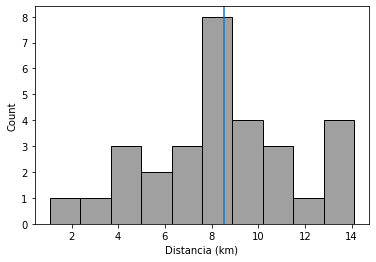

In [77]:
sns.histplot(x = strava['Distancia (km)'], bins = 10, color="grey").axvline(np.mean(strava['Distancia (km)']))

The average distance of the last 30 races is `8,51 km`.

### Is there any relation between `time` and `distance`?

<AxesSubplot:xlabel='Distancia (km)', ylabel='Tiempo (min)'>

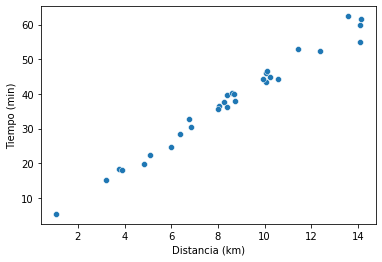

In [9]:
sns.scatterplot(x = strava['Distancia (km)'], y = strava['Tiempo (min)'])

Logically, the longer the distance, the longer the time, although this relationship varies slightly if you have gone faster or slower.

### Is there any relation between `distance` and `rhythm`?

<AxesSubplot:xlabel='Distancia (km)', ylabel='Ritmo medio (min/km)'>

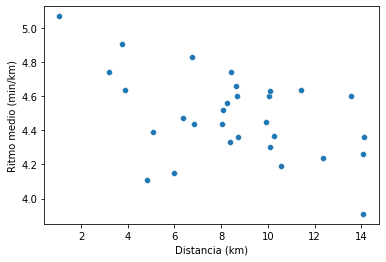

In [78]:
sns.scatterplot(x = strava['Distancia (km)'], y = strava['Ritmo medio (min/km)'])

there is no clear relationship between average pace and distance.

<AxesSubplot:xlabel='Altitud (m)', ylabel='Density'>

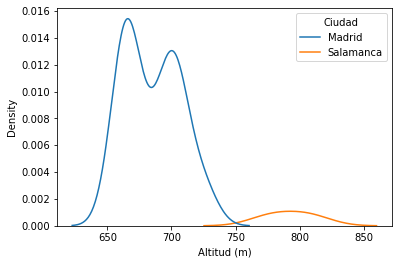

In [10]:
sns.kdeplot(x = strava['Altitud (m)'], hue =strava['Ciudad'])

### What is the relationship between `heart rate` and `rhythm`?

<AxesSubplot:xlabel='Ritmo medio (min/km)', ylabel='Pulso medio (ppm)'>

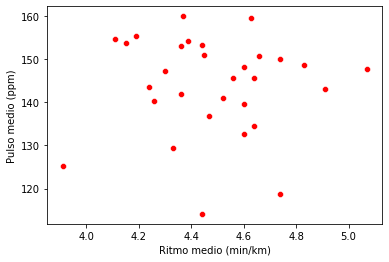

In [11]:
sns.scatterplot(x = strava['Ritmo medio (min/km)'], y = strava['Pulso medio (ppm)'], color='red')

in most cases, the higher the pace, the higher the heart rate.

### Is there any relation between `rhythm` and `elevation`?

<AxesSubplot:xlabel='Ritmo medio (min/km)', ylabel='Elevacion (m)'>

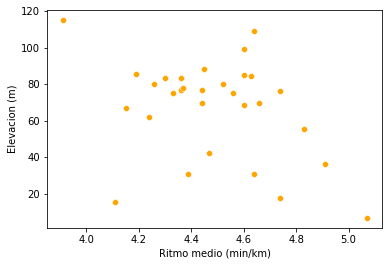

In [12]:
sns.scatterplot(x = strava['Ritmo medio (min/km)'], y = strava['Elevacion (m)'], color='Orange')

In most cases, the higher the `Elevation`, the higher the `heart rate`.

### PACE

<AxesSubplot:xlabel='Ritmo medio (min/km)'>

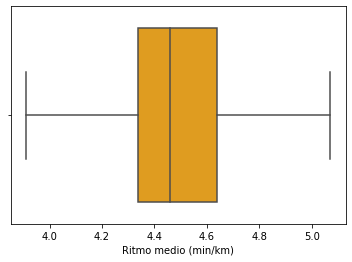

In [127]:
sns.boxplot(x = "Ritmo medio (min/km)", data = strava, color="orange")

The average `Pace` is `4,48 min /km`.

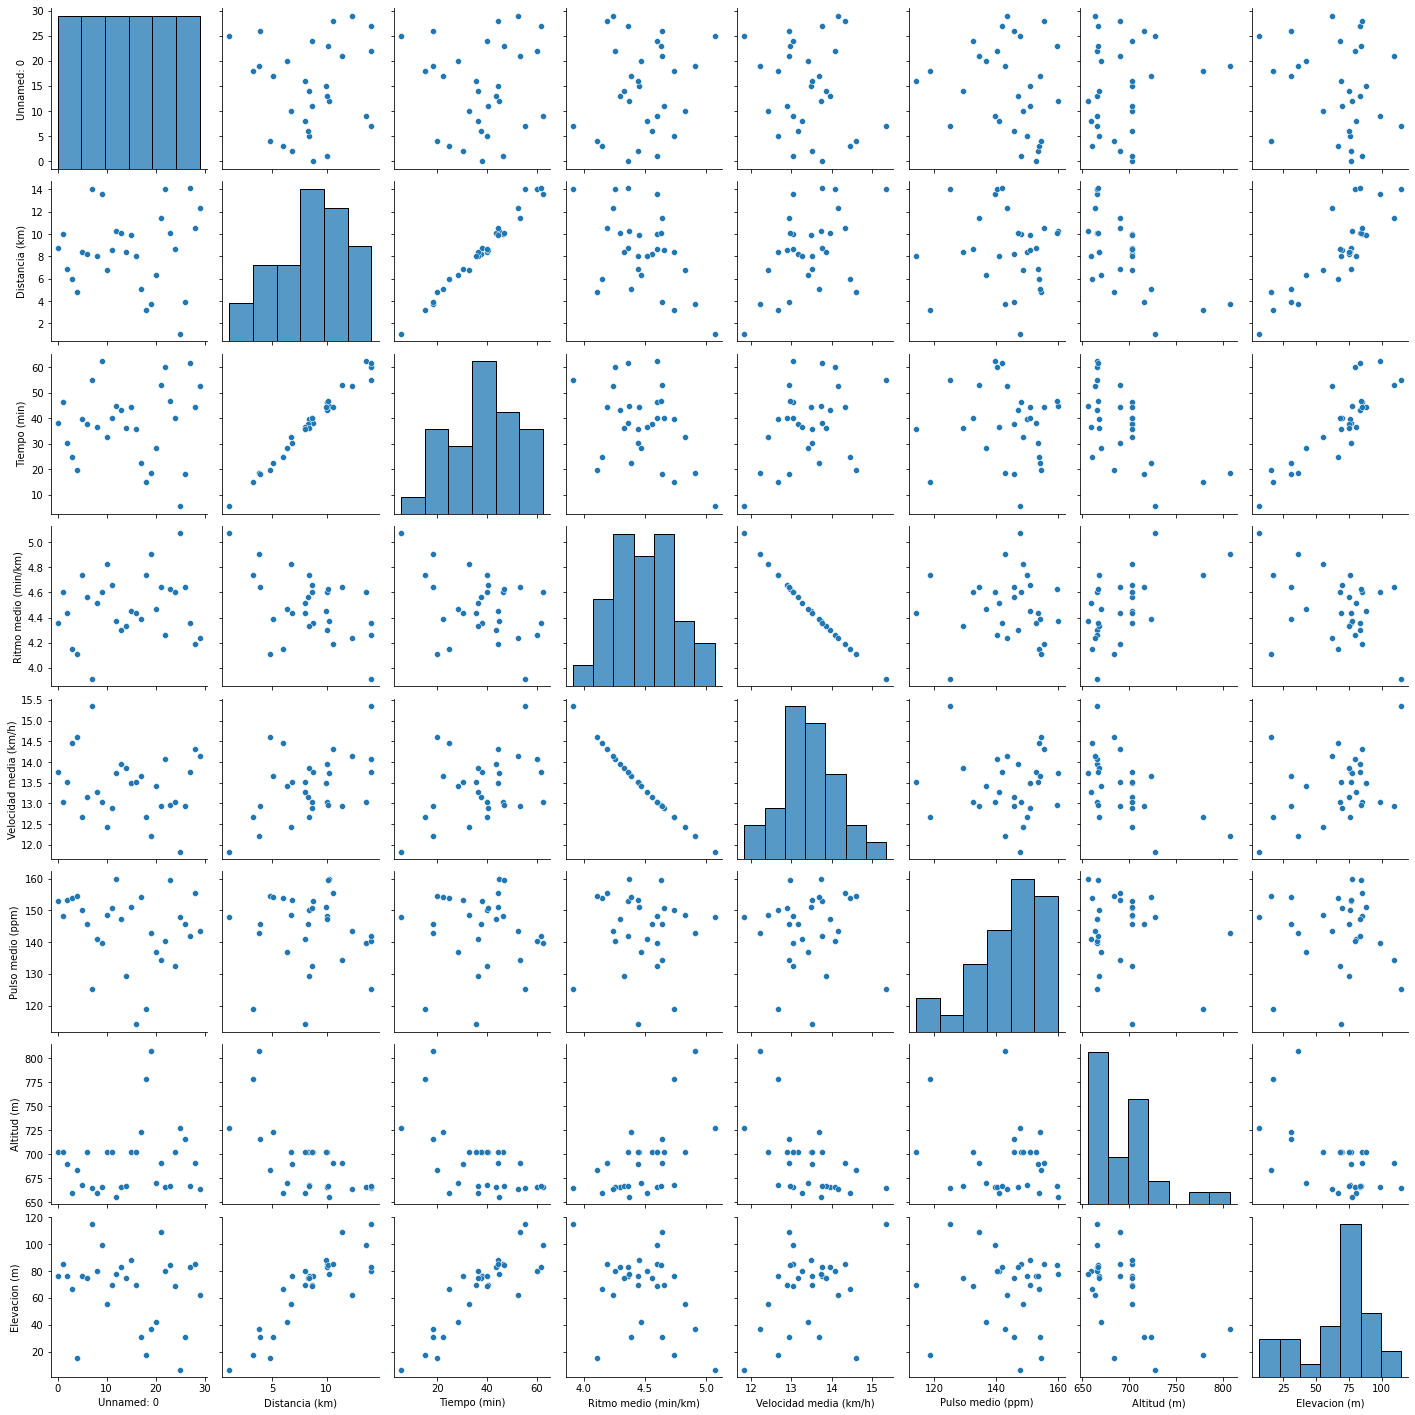

In [13]:
sns.pairplot(data = strava)

# Scrap
To obtain information from a web page from which we cannot perform APIs because we do not have access to the token, we can do it by `WebScraping`.

The information have been taken from [Wikipedia](https://es.wikipedia.org/wiki/Marat%C3%B3n)

In [81]:
man.head(3)

,Posicion,Tiempo,Nombre,Pais,Fecha,Lugar,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,1,2:01:39,Eliud Kipchoge,Kenia,16 de septiembre de 2018,Berlín,121.65,2.88,20.83
1,2,2:01:41,Kenenisa Bekele,Etiopía,29 de septiembre de 2019,Berlín,121.68,2.88,20.83
2,3,2:02:48,Birhanu Legese,Etiopía,29 de septiembre de 2019,Berlín,122.80,2.91,20.62


In [80]:
woman.head(3)

,Posicion,Tiempo,Nombre,Pais,Fecha,Lugar,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,1,2:14:04,Brigid Kosgei,Kenia,13 de octubre de 2019,Chicago,134.07,3.18,18.87
1,2,2:15:25,Paula Radcliffe,Reino Unido,13 de abril de 2003,Londres,135.42,3.21,18.69
2,3,2:17:01,Mary Jepkosgei Keitany,Kenia,23 de abril de 2017,Londres,137.02,3.25,18.46


### `Where are they from` and where have they made the `best times`?

<AxesSubplot:xlabel='Lugar', ylabel='Count'>

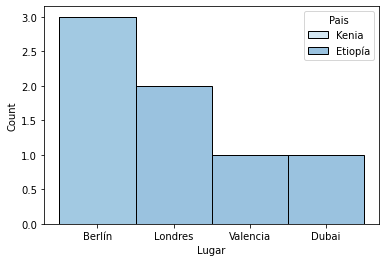

In [134]:
sns.histplot(x = man['Lugar'],hue=man['Pais'], palette="Blues")

As we can see in the graph most of the male runners are from `Ethiopia` and have broken the record in `Berlin`.

<AxesSubplot:xlabel='Lugar', ylabel='Count'>

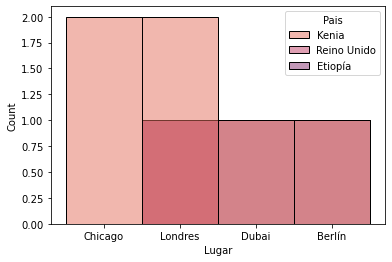

In [117]:
sns.histplot(x = woman['Lugar'],hue=woman['Pais'], palette="flare")

As we can see in the graph most of the female runners are from `Kenia` and have broken the record in `Chicago` and `London`.

### PACE

<AxesSubplot:xlabel='Ritmo (min/km)'>

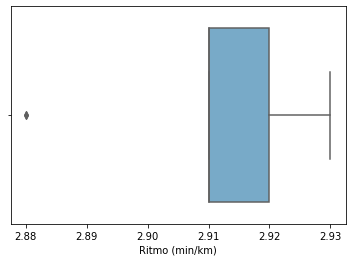

In [133]:
sns.boxplot(x = "Ritmo (min/km)", data = man, palette="Blues")

<AxesSubplot:xlabel='Ritmo (min/km)'>

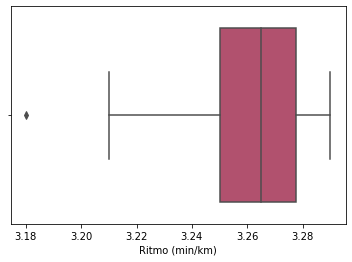

In [123]:
sns.boxplot(x = "Ritmo (min/km)", data = woman, palette="flare")

The average `pace` of women is slower than that of men.

# Kaggle

`Kaggle` is one of the best sites to get databases from. From this page we have downloaded a database with all the runners who attended the [Hong Kong marathon](https://www.kaggle.com/melvincheung/hong-kong-marathon-2016) held in 2016.

We have divided this data into two groups, the `100 best` and a group with `another 100 runners` that resemble the marks provided by `Strava`.

In [56]:
top_100.head()

,Unnamed: 0,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36,132.20,3.13,19.17
1,1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36,132.23,3.13,19.17
2,2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36,132.33,3.14,19.11
3,3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36,132.48,3.14,19.11
4,4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36,132.78,3.15,19.05


<AxesSubplot:xlabel='Count', ylabel='Country '>

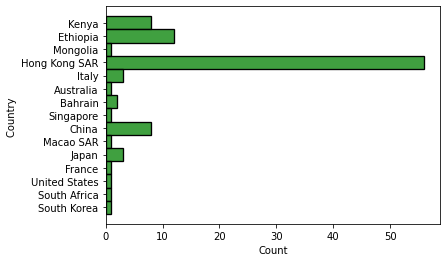

In [60]:
sns.histplot(y = top_100['Country '], color="Green")

In the case of the `Hong Kong marathon` top 100, most of the participants were from Hong Kong, followed by `Ethiopia` and `Kenya`.

<AxesSubplot:xlabel='Ritmo (min/km)'>

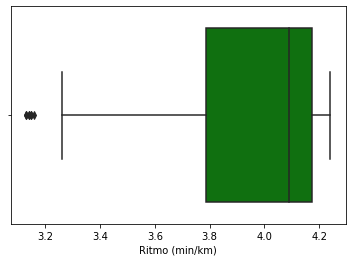

In [120]:
sns.boxplot(x = "Ritmo (min/km)", data = top_100, color="green")

In [69]:
media.head()

,Unnamed: 0,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
0,800,801,753,244,MMM2,28205,Hong Kong SAR,3:35:37,3:35:32,0:50:00,1:44:04,2:28:10,215.62,5.11,11.74
1,801,802,754,245,MMM2,28397,Japan,3:35:39,3:35:19,0:43:21,1:30:43,2:17:54,215.65,5.11,11.74
2,802,803,755,314,MMM1,24228,British Indian Ocean Territory,3:35:44,3:35:19,0:49:17,1:44:13,2:29:28,215.73,5.11,11.74
3,803,804,756,246,MMM2,28324,Japan,3:35:46,3:34:58,0:52:52,1:48:48,2:32:48,215.77,5.11,11.74
4,804,806,757,247,MMM2,28132,Hong Kong SAR,3:35:47,3:35:43,0:48:14,1:40:51,2:24:12,215.78,5.11,11.74


<AxesSubplot:xlabel='Count', ylabel='Country '>

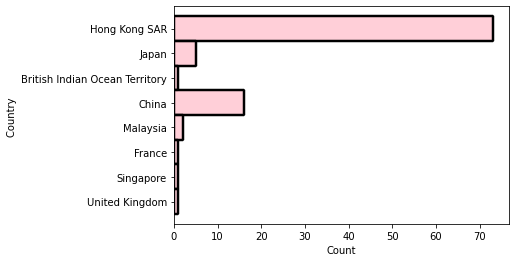

In [119]:
sns.histplot(y = media['Country '], color="pink")

In the case of the `Hong Kong marathon`, most of the participants were from Hong Kong, followed by `China` and `Japan`.

<AxesSubplot:xlabel='Ritmo (min/km)'>

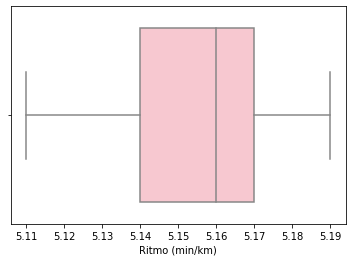

In [125]:
sns.boxplot(x = "Ritmo (min/km)", data = media, color="pink")

# Comparison

### PACE

<AxesSubplot:xlabel='Ritmo (min/km)'>

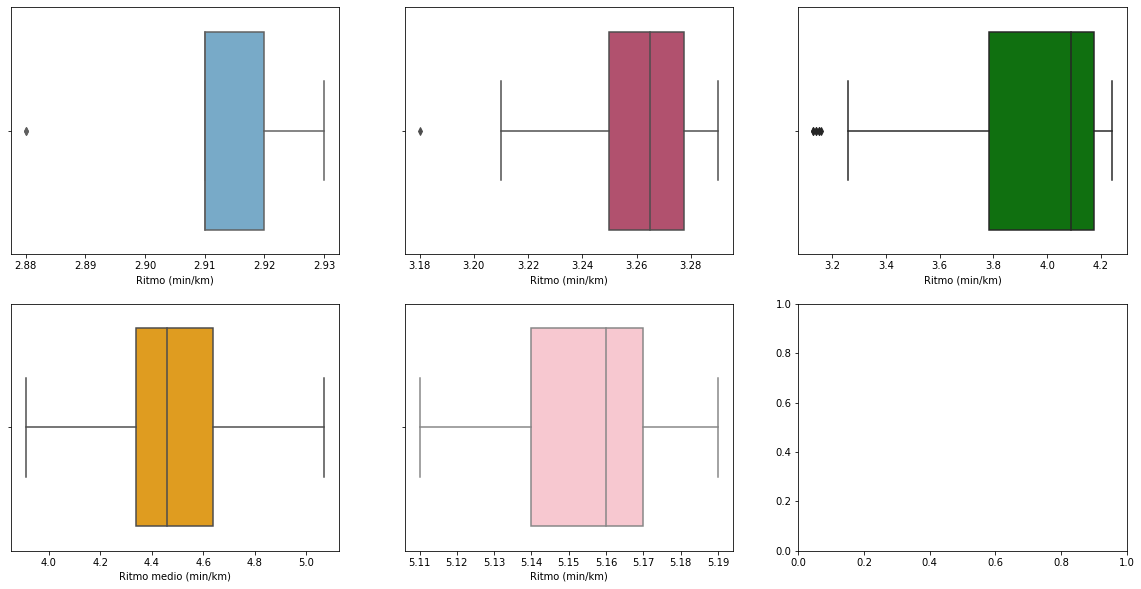

In [147]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.boxplot(x = "Ritmo (min/km)", data = man, palette="Blues", ax=axs[0,0])
sns.boxplot(x = "Ritmo (min/km)", data = woman, palette="flare", ax=axs[0,1])
sns.boxplot(x = "Ritmo (min/km)", data = top_100, color="green", ax=axs[0,2])

sns.boxplot(x = "Ritmo medio (min/km)", data = strava, color="orange", ax=axs[1,0])
sns.boxplot(x = "Ritmo (min/km)", data = media, color="pink", ax=axs[1,1])

In the first row we can see the average pace differences between the `10 best professional runners` and the `100 best runners of the Hong Kong marathon`.

While in the bottom row we see the comparison between the `Strava` data and the data of the non-professional runners of the `Hong Kong marathon`.

### Nationalities

<AxesSubplot:xlabel='Count', ylabel='Country '>

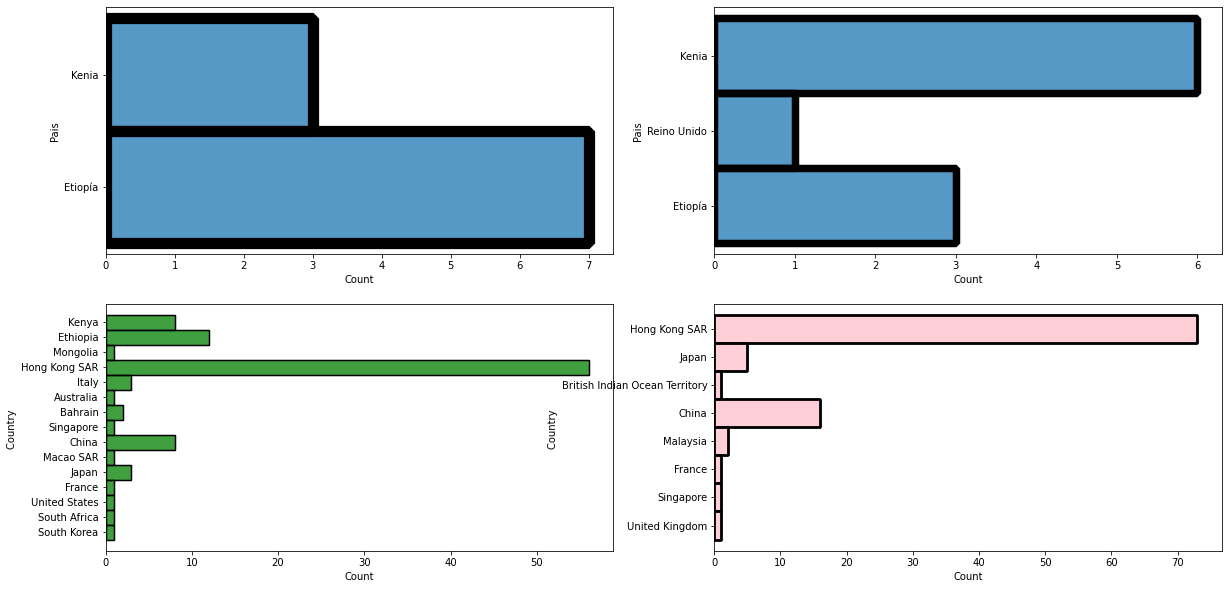

In [154]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.histplot(y = man['Pais'], palette="Blues", ax=axs[0,0])
sns.histplot(y = woman['Pais'], palette="flare",  ax=axs[0, 1])

sns.histplot(y = top_100['Country '], color="Green", ax=axs[1,0])
sns.histplot(y = media['Country '], color="pink", ax=axs[1,1])

As we can see, the most repeated countries among the `best runners` are `Kenya` and `Ethiopia`.

In [62]:
man.describe()

,Posicion,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,122.881000,2.910000,20.620000
std,3.02765,0.705604,0.017638,0.123468
min,1.00000,121.650000,2.880000,20.480000
25%,3.25000,122.830000,2.910000,20.550000
50%,5.50000,122.975000,2.910000,20.620000
75%,7.75000,123.257500,2.920000,20.620000
max,10.00000,123.750000,2.930000,20.830000


In [61]:
top_100.describe()

,Unnamed: 0,Overall Position,Gender Position,Category Position,Race No,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,49.500000,50.500000,40.710000,14.510000,20553.080000,166.553100,3.94690,15.317100
std,29.011492,29.011492,27.292022,11.538688,8132.558715,13.663801,0.32402,1.424242
min,0.000000,1.000000,1.000000,1.000000,2.000000,132.200000,3.13000,14.150000
25%,24.750000,25.750000,14.750000,5.000000,20839.500000,159.652500,3.78500,14.380000
50%,49.500000,50.500000,39.500000,11.000000,21082.000000,172.560000,4.09000,14.670000
75%,74.250000,75.250000,64.250000,23.000000,24523.750000,175.987500,4.17250,15.852500
max,99.000000,100.000000,89.000000,42.000000,30259.000000,179.100000,4.24000,19.170000


In [70]:
media.describe()

,Unnamed: 0,Overall Position,Gender Position,Category Position,Race No,Tiempo (min),Ritmo (min/km),Velocidad media (km/h)
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,849.500000,850.500000,754.62000,262.630000,25646.460000,217.562600,5.155200,11.63950
std,29.011492,29.011492,180.48273,77.533525,3295.941969,0.948293,0.022224,0.05028
min,800.000000,801.000000,49.00000,9.000000,20011.000000,215.620000,5.110000,11.56000
25%,824.750000,825.750000,771.75000,248.750000,23398.000000,216.877500,5.140000,11.61000
50%,849.500000,850.500000,796.50000,273.500000,26056.500000,217.710000,5.160000,11.63000
75%,874.250000,875.250000,821.25000,321.250000,27785.250000,218.305000,5.170000,11.67000
max,899.000000,900.000000,846.00000,346.000000,36267.000000,219.200000,5.190000,11.74000


In [71]:
strava.describe()

,Unnamed: 0,Distancia (km),Tiempo (min),Ritmo medio (min/km),Velocidad media (km/h),Pulso medio (ppm),Altitud (m),Elevacion (m)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,14.500000,8.516667,37.777000,4.483667,13.421667,144.013333,692.23000,67.396667
std,8.803408,3.368605,14.332539,0.250275,0.754102,11.356442,34.47695,26.903717
min,0.000000,1.070000,5.420000,3.910000,11.830000,114.100000,655.50000,6.700000
25%,7.250000,6.470000,28.945000,4.337500,12.937500,139.775000,666.10000,56.900000
50%,14.500000,8.510000,38.925000,4.460000,13.450000,146.450000,690.30000,75.550000
75%,21.750000,10.210000,45.822500,4.637500,13.835000,152.525000,702.60000,83.275000
max,29.000000,14.110000,62.400000,5.070000,15.350000,160.000000,807.10000,115.000000


### PACE